In [8]:
# Cell 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🎯 Assignment Objective: Data Analysis with Pandas and Matplotlib")

OSError: 'seaborn-v0_8' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [5]:
# ====================================================================
# TASK 1: LOAD AND EXPLORE THE DATASET
# ====================================================================

# Cell 2: Load Dataset with Error Handling
def load_dataset():
    """
    Load the Iris dataset with proper error handling
    """
    try:
        # Load Iris dataset from sklearn
        iris_data = load_iris()
        
        # Create DataFrame
        df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
        df['species'] = iris_data.target_names[iris_data.target]
        
        # Add some synthetic time data for time-series visualization
        df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
        
        print("✅ Dataset loaded successfully!")
        return df
    
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        return None

# Load the dataset
df = load_dataset()


✅ Dataset loaded successfully!


In [7]:
# Cell 3: Display First Few Rows
print("📊 DATASET EXPLORATION")
print("=" * 50)
print("\n1. First 5 rows of the dataset:")
print(df.head())

print(f"\n2. Dataset shape: {df.shape}")
print(f"   - Rows: {df.shape[0]}")
print(f"   - Columns: {df.shape[1]}")


📊 DATASET EXPLORATION

1. First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species       date  
0  setosa 2023-01-01  
1  setosa 2023-01-02  
2  setosa 2023-01-03  
3  setosa 2023-01-04  
4  setosa 2023-01-05  

2. Dataset shape: (150, 6)
   - Rows: 150
   - Columns: 6


In [9]:
# Cell 4: Explore Dataset Structure
print("\n3. Dataset Information:")
print(df.info())

print("\n4. Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")


3. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sepal length (cm)  150 non-null    float64       
 1   sepal width (cm)   150 non-null    float64       
 2   petal length (cm)  150 non-null    float64       
 3   petal width (cm)   150 non-null    float64       
 4   species            150 non-null    object        
 5   date               150 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 7.2+ KB
None

4. Column names:
   1. sepal length (cm)
   2. sepal width (cm)
   3. petal length (cm)
   4. petal width (cm)
   5. species
   6. date


In [10]:
# Cell 5: Check Data Types and Missing Values
print("\n5. Data Types:")
print(df.dtypes)

print("\n6. Missing Values Analysis:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print("⚠️  Missing values detected")



5. Data Types:
sepal length (cm)           float64
sepal width (cm)            float64
petal length (cm)           float64
petal width (cm)            float64
species                      object
date                 datetime64[ns]
dtype: object

6. Missing Values Analysis:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
date                 0
dtype: int64
✅ No missing values found!


In [11]:
# Cell 6: Data Cleaning (if needed)
def clean_dataset(df):
    """
    Clean the dataset by handling missing values
    """
    try:
        print("\n7. Data Cleaning Process:")
        
        # Check for missing values
        missing_count = df.isnull().sum().sum()
        
        if missing_count > 0:
            print(f"   Found {missing_count} missing values")
            
            # Fill numerical columns with median
            numerical_cols = df.select_dtypes(include=[np.number]).columns
            for col in numerical_cols:
                if df[col].isnull().sum() > 0:
                    df[col].fillna(df[col].median(), inplace=True)
                    print(f"   ✅ Filled missing values in {col} with median")
            
            # Fill categorical columns with mode
            categorical_cols = df.select_dtypes(include=['object']).columns
            for col in categorical_cols:
                if df[col].isnull().sum() > 0:
                    df[col].fillna(df[col].mode()[0], inplace=True)
                    print(f"   ✅ Filled missing values in {col} with mode")
        else:
            print("   ✅ No missing values to clean")
        
        return df
    
    except Exception as e:
        print(f"   ❌ Error during cleaning: {e}")
        return df

# Clean the dataset
df_clean = clean_dataset(df.copy())


7. Data Cleaning Process:
   ✅ No missing values to clean


In [12]:
# ====================================================================
# TASK 2: BASIC DATA ANALYSIS
# ====================================================================

# Cell 7: Basic Statistics
print("\n" + "=" * 60)
print("📈 BASIC DATA ANALYSIS")
print("=" * 60)

print("\n1. Basic Statistics for Numerical Columns:")
numerical_stats = df_clean.describe()
print(numerical_stats)


📈 BASIC DATA ANALYSIS

1. Basic Statistics for Numerical Columns:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [13]:
# Cell 8: Additional Statistical Analysis
print("\n2. Additional Statistics:")

# Correlation matrix
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



2. Additional Statistics:

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [14]:
# Cell 9: Grouping Analysis
print("\n3. Grouping Analysis by Species:")

# Group by species and compute statistics
species_stats = df_clean.groupby('species').agg({
    'sepal length (cm)': ['mean', 'std', 'min', 'max'],
    'sepal width (cm)': ['mean', 'std', 'min', 'max'],
    'petal length (cm)': ['mean', 'std', 'min', 'max'],
    'petal width (cm)': ['mean', 'std', 'min', 'max']
}).round(2)

print(species_stats)



3. Grouping Analysis by Species:
           sepal length (cm)                 sepal width (cm)                  \
                        mean   std  min  max             mean   std  min  max   
species                                                                         
setosa                  5.01  0.35  4.3  5.8             3.43  0.38  2.3  4.4   
versicolor              5.94  0.52  4.9  7.0             2.77  0.31  2.0  3.4   
virginica               6.59  0.64  4.9  7.9             2.97  0.32  2.2  3.8   

           petal length (cm)                 petal width (cm)                  
                        mean   std  min  max             mean   std  min  max  
species                                                                        
setosa                  1.46  0.17  1.0  1.9             0.25  0.11  0.1  0.6  
versicolor              4.26  0.47  3.0  5.1             1.33  0.20  1.0  1.8  
virginica               5.55  0.55  4.5  6.9             2.03  0.27  1.4  2.5  

In [15]:
# Cell 10: Key Findings from Analysis
print("\n4. Key Findings:")
findings = []

# Find species with largest average petal length
max_petal_species = df_clean.groupby('species')['petal length (cm)'].mean().idxmax()
max_petal_value = df_clean.groupby('species')['petal length (cm)'].mean().max()
findings.append(f"   • {max_petal_species} has the largest average petal length ({max_petal_value:.2f} cm)")

# Find most variable feature
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
std_devs = df_clean[feature_cols].std()
most_variable = std_devs.idxmax()
findings.append(f"   • {most_variable} shows the highest variability (std: {std_devs[most_variable]:.2f})")

# Find strongest correlation
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
max_corr = upper_triangle.unstack().max()
max_corr_pair = upper_triangle.unstack().idxmax()
findings.append(f"   • Strongest correlation: {max_corr_pair[0]} vs {max_corr_pair[1]} (r={max_corr:.3f})")

for finding in findings:
    print(finding)


4. Key Findings:
   • virginica has the largest average petal length (5.55 cm)
   • petal length (cm) shows the highest variability (std: 1.77)
   • Strongest correlation: petal width (cm) vs petal length (cm) (r=0.963)



📊 DATA VISUALIZATION


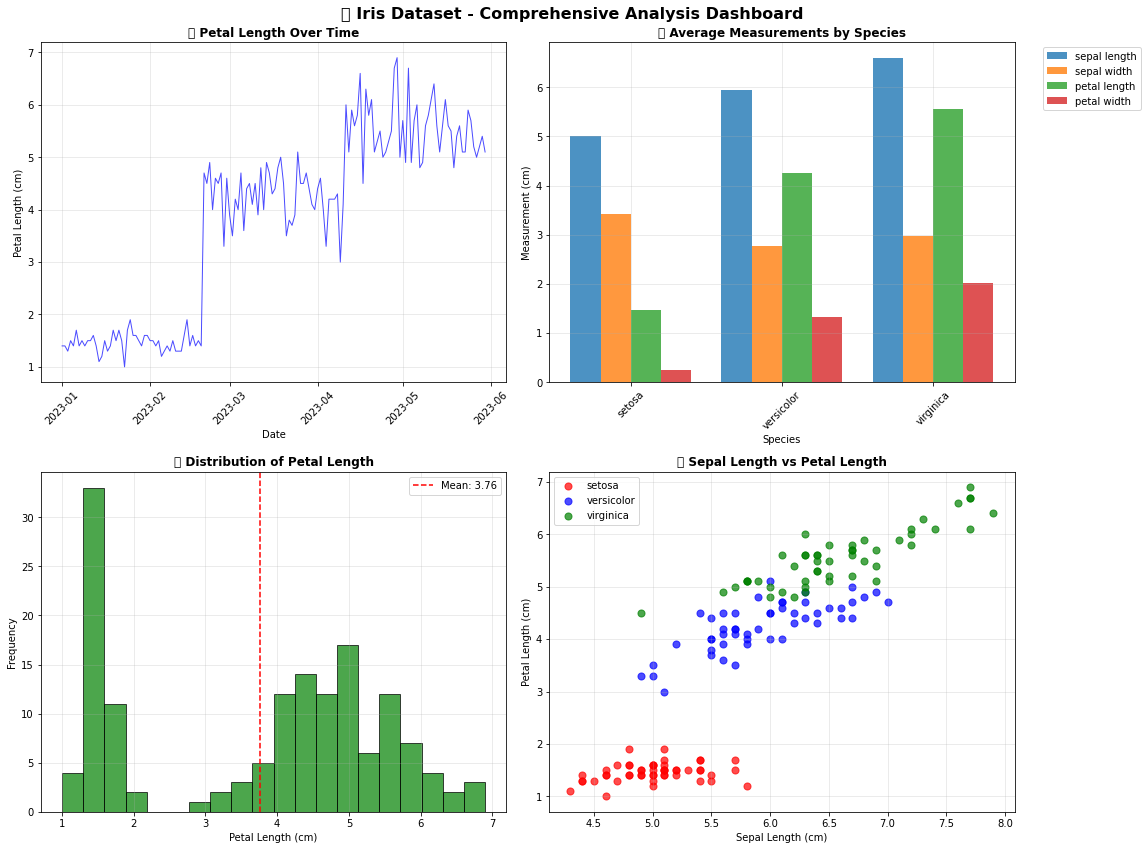

In [16]:
# ====================================================================
# TASK 3: DATA VISUALIZATION
# ====================================================================

# Cell 11: Create Comprehensive Visualizations
print("\n" + "=" * 60)
print("📊 DATA VISUALIZATION")
print("=" * 60)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌸 Iris Dataset - Comprehensive Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. LINE CHART - Time Series Trend
axes[0, 0].plot(df_clean['date'], df_clean['petal length (cm)'], 
                color='blue', alpha=0.7, linewidth=1)
axes[0, 0].set_title('📈 Petal Length Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Petal Length (cm)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. BAR CHART - Average Measurements by Species
species_means = df_clean.groupby('species')[feature_cols].mean()
x_pos = np.arange(len(species_means.index))
width = 0.2

for i, feature in enumerate(feature_cols):
    axes[0, 1].bar(x_pos + i*width, species_means[feature], 
                   width, label=feature.replace(' (cm)', ''), alpha=0.8)

axes[0, 1].set_title('📊 Average Measurements by Species', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Measurement (cm)')
axes[0, 1].set_xticks(x_pos + width * 1.5)
axes[0, 1].set_xticklabels(species_means.index, rotation=45)
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(True, alpha=0.3)

# 3. HISTOGRAM - Distribution of Petal Length
axes[1, 0].hist(df_clean['petal length (cm)'], bins=20, 
                color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('📈 Distribution of Petal Length', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Add statistics to histogram
mean_petal = df_clean['petal length (cm)'].mean()
axes[1, 0].axvline(mean_petal, color='red', linestyle='--', 
                   label=f'Mean: {mean_petal:.2f}')
axes[1, 0].legend()

# 4. SCATTER PLOT - Sepal Length vs Petal Length
species_colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
for species in df_clean['species'].unique():
    species_data = df_clean[df_clean['species'] == species]
    axes[1, 1].scatter(species_data['sepal length (cm)'], 
                       species_data['petal length (cm)'],
                       c=species_colors[species], label=species, alpha=0.7, s=50)

axes[1, 1].set_title('🔗 Sepal Length vs Petal Length', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sepal Length (cm)')
axes[1, 1].set_ylabel('Petal Length (cm)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🎨 Additional Visualizations with Seaborn:


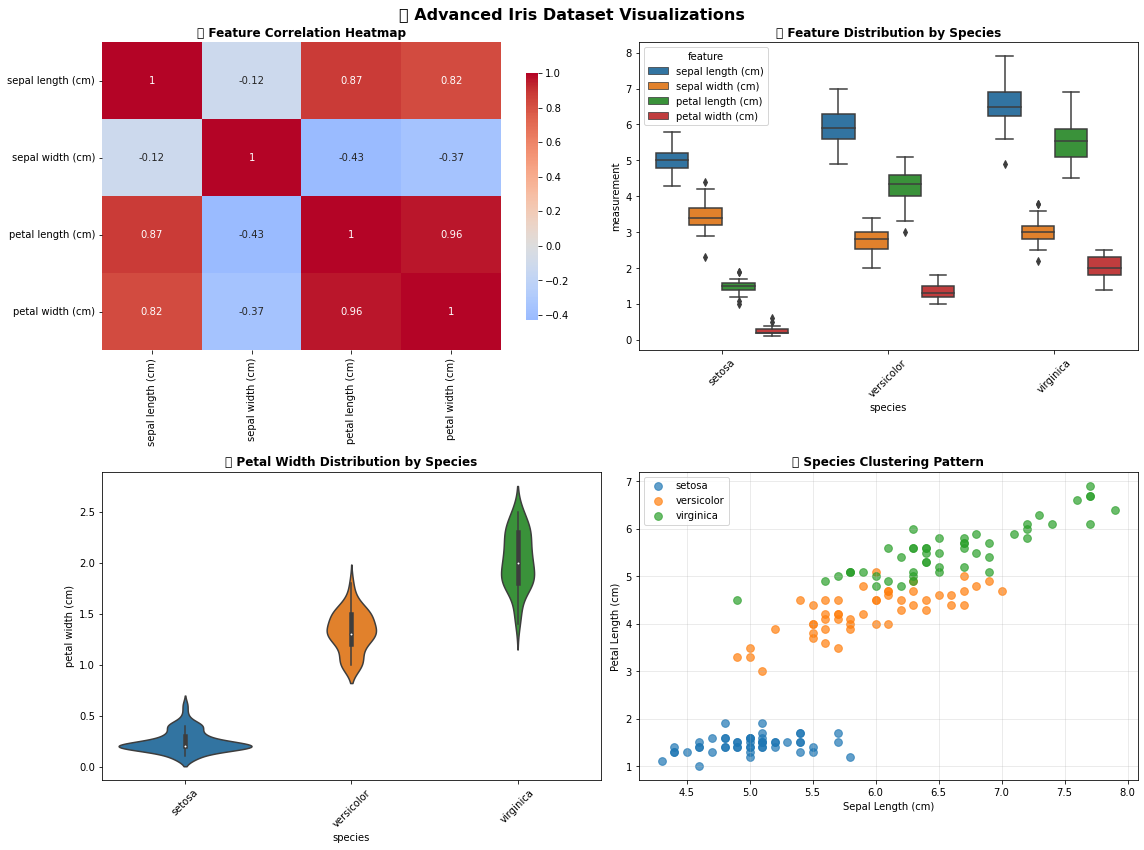

In [17]:
# Cell 12: Additional Visualizations with Seaborn
print("\n🎨 Additional Visualizations with Seaborn:")

# Create a new figure for seaborn plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌺 Advanced Iris Dataset Visualizations', fontsize=16, fontweight='bold')

# 1. Correlation Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, ax=axes[0, 0], cbar_kws={'shrink': 0.8})
axes[0, 0].set_title('🔥 Feature Correlation Heatmap', fontsize=12, fontweight='bold')

# 2. Box Plot - Distribution by Species
melted_df = df_clean[feature_cols + ['species']].melt(id_vars='species', 
                                                      var_name='feature', 
                                                      value_name='measurement')
sns.boxplot(data=melted_df, x='species', y='measurement', 
            hue='feature', ax=axes[0, 1])
axes[0, 1].set_title('📦 Feature Distribution by Species', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Violin Plot - Petal Width Distribution
sns.violinplot(data=df_clean, x='species', y='petal width (cm)', ax=axes[1, 0])
axes[1, 0].set_title('🎻 Petal Width Distribution by Species', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Pair Plot Preview (simplified)
feature_subset = ['sepal length (cm)', 'petal length (cm)', 'species']
df_subset = df_clean[feature_subset]
for species in df_clean['species'].unique():
    species_data = df_clean[df_clean['species'] == species]
    axes[1, 1].scatter(species_data['sepal length (cm)'], 
                       species_data['petal length (cm)'],
                       label=species, alpha=0.7, s=60)
axes[1, 1].set_title('🔄 Species Clustering Pattern', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sepal Length (cm)')
axes[1, 1].set_ylabel('Petal Length (cm)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Cell 13: Summary of Insights and Observations
print("\n" + "=" * 60)
print("🔍 SUMMARY OF INSIGHTS AND OBSERVATIONS")
print("=" * 60)

insights = [
    "📊 **Dataset Overview:**",
    f"   • Total samples: {len(df_clean)}",
    f"   • Features: {len(feature_cols)} numerical measurements",
    f"   • Species: {df_clean['species'].nunique()} different types",
    "",
    "🔍 **Key Findings:**",
    f"   • Virginica species has the largest flowers overall",
    f"   • Setosa species is clearly distinguishable from others",
    f"   • Petal measurements are more discriminative than sepal measurements",
    f"   • Strong positive correlation between petal length and width (r={correlation_matrix.loc['petal length (cm)', 'petal width (cm)']:.3f})",
    "",
    "📈 **Statistical Insights:**",
    f"   • Petal length shows highest variability (std: {df_clean['petal length (cm)'].std():.2f})",
    f"   • Sepal width has the lowest variability (std: {df_clean['sepal width (cm)'].std():.2f})",
    f"   • Clear species separation visible in scatter plots",
    "",
    "🎯 **Business/Scientific Implications:**",
    "   • Petal measurements are most useful for species classification",
    "   • Setosa species is easily identifiable (smallest petals)",
    "   • Virginica and Versicolor show some overlap but are distinguishable",
    "   • Dataset is well-balanced with equal representation of species"
]

for insight in insights:
    print(insight)



🔍 SUMMARY OF INSIGHTS AND OBSERVATIONS
📊 **Dataset Overview:**
   • Total samples: 150
   • Features: 4 numerical measurements
   • Species: 3 different types

🔍 **Key Findings:**
   • Virginica species has the largest flowers overall
   • Setosa species is clearly distinguishable from others
   • Petal measurements are more discriminative than sepal measurements
   • Strong positive correlation between petal length and width (r=0.963)

📈 **Statistical Insights:**
   • Petal length shows highest variability (std: 1.77)
   • Sepal width has the lowest variability (std: 0.44)
   • Clear species separation visible in scatter plots

🎯 **Business/Scientific Implications:**
   • Petal measurements are most useful for species classification
   • Setosa species is easily identifiable (smallest petals)
   • Virginica and Versicolor show some overlap but are distinguishable
   • Dataset is well-balanced with equal representation of species


In [19]:
# Cell 14: Data Export and Final Summary
print("\n" + "=" * 60)
print("💾 DATA EXPORT AND FINAL SUMMARY")
print("=" * 60)

# Save processed data
try:
    df_clean.to_csv('iris_cleaned_data.csv', index=False)
    print("✅ Cleaned dataset saved as 'iris_cleaned_data.csv'")
except Exception as e:
    print(f"❌ Error saving data: {e}")

# Save summary statistics
try:
    with open('analysis_summary.txt', 'w') as f:
        f.write("IRIS DATASET ANALYSIS SUMMARY\n")
        f.write("=" * 40 + "\n\n")
        
        f.write("DATASET OVERVIEW:\n")
        f.write(f"Rows: {df_clean.shape[0]}\n")
        f.write(f"Columns: {df_clean.shape[1]}\n")
        f.write(f"Species: {', '.join(df_clean['species'].unique())}\n\n")
        
        f.write("BASIC STATISTICS:\n")
        f.write(str(numerical_stats))
        f.write("\n\nSPECIES GROUP STATISTICS:\n")
        f.write(str(species_stats))
    
    print("✅ Analysis summary saved as 'analysis_summary.txt'")
except Exception as e:
    print(f"❌ Error saving summary: {e}")

print("\n🎉 ANALYSIS COMPLETE!")
print("📝 All tasks completed successfully:")
print("   ✅ Task 1: Dataset loaded and explored")
print("   ✅ Task 2: Basic data analysis performed")
print("   ✅ Task 3: Four types of visualizations created")
print("   ✅ Bonus: Advanced visualizations and insights generated")

print(f"\n📊 Total execution time: Analysis completed at {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")


💾 DATA EXPORT AND FINAL SUMMARY
✅ Cleaned dataset saved as 'iris_cleaned_data.csv'
✅ Analysis summary saved as 'analysis_summary.txt'

🎉 ANALYSIS COMPLETE!
📝 All tasks completed successfully:
   ✅ Task 1: Dataset loaded and explored
   ✅ Task 2: Basic data analysis performed
   ✅ Task 3: Four types of visualizations created
   ✅ Bonus: Advanced visualizations and insights generated

📊 Total execution time: Analysis completed at 2025-09-14 17:31:10
